In [3]:
# Referred from https://www.statsmodels.org/stable/examples/notebooks/generated
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as pdr
import seaborn as sns
from statsmodels.tsa.api import acf, graphics, pacf
from statsmodels.tsa.ar_model import AutoReg, ar_select_order

In [4]:
sns.set_style("darkgrid")
pd.plotting.register_matplotlib_converters()
# Default figure size
sns.mpl.rc("figure", figsize=(16, 6))
sns.mpl.rc("font", size=14)

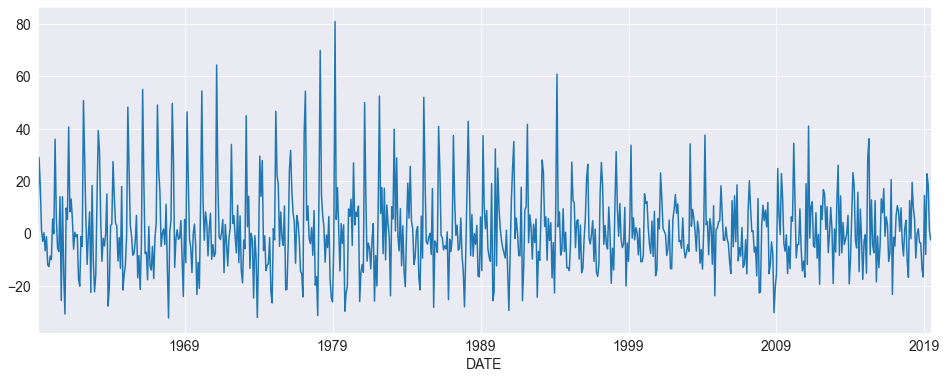

In [5]:
data = pdr.get_data_fred("HOUSTNSA", "1959-01-01", "2019-06-01")
housing = data.HOUSTNSA.pct_change().dropna()
# Scale by 100 to get percentages
housing = 100 * housing.asfreq("MS")
fig, ax = plt.subplots()
ax = housing.plot(ax=ax)

In [6]:
mod = AutoReg(housing, 3, old_names=False)
res = mod.fit()
print(res.summary())

                            AutoReg Model Results                             
Dep. Variable:               HOUSTNSA   No. Observations:                  725
Model:                     AutoReg(3)   Log Likelihood               -2993.442
Method:               Conditional MLE   S.D. of innovations             15.289
Date:                Tue, 18 Jan 2022   AIC                              5.468
Time:                        21:57:10   BIC                              5.500
Sample:                    05-01-1959   HQIC                             5.480
                         - 06-01-2019                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.1228      0.573      1.961      0.050       0.000       2.245
HOUSTNSA.L1     0.1910      0.036      5.235      0.000       0.120       0.263
HOUSTNSA.L2     0.0058      0.037      0.155    

In [7]:
res = mod.fit(cov_type="HC0")
print(res.summary())

                            AutoReg Model Results                             
Dep. Variable:               HOUSTNSA   No. Observations:                  725
Model:                     AutoReg(3)   Log Likelihood               -2993.442
Method:               Conditional MLE   S.D. of innovations             15.289
Date:                Tue, 18 Jan 2022   AIC                              5.468
Time:                        21:57:11   BIC                              5.500
Sample:                    05-01-1959   HQIC                             5.480
                         - 06-01-2019                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.1228      0.601      1.869      0.062      -0.055       2.300
HOUSTNSA.L1     0.1910      0.035      5.499      0.000       0.123       0.259
HOUSTNSA.L2     0.0058      0.039      0.150    

In [8]:
sel = ar_select_order(housing, 13, old_names=False)
sel.ar_lags
res = sel.model.fit()
print(res.summary())

                            AutoReg Model Results                             
Dep. Variable:               HOUSTNSA   No. Observations:                  725
Model:                    AutoReg(13)   Log Likelihood               -2676.157
Method:               Conditional MLE   S.D. of innovations             10.378
Date:                Tue, 18 Jan 2022   AIC                              4.722
Time:                        21:57:11   BIC                              4.818
Sample:                    03-01-1960   HQIC                             4.759
                         - 06-01-2019                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            1.3615      0.458      2.970      0.003       0.463       2.260
HOUSTNSA.L1     -0.2900      0.036     -8.161      0.000      -0.360      -0.220
HOUSTNSA.L2     -0.0828      0.031     -2.65

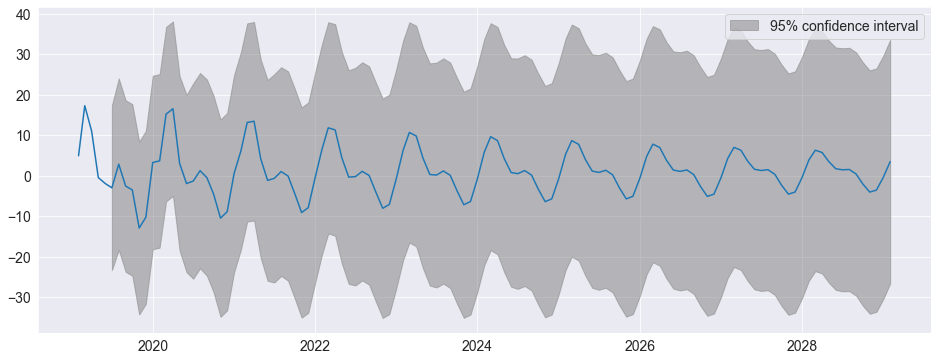

In [9]:
fig = res.plot_predict(720, 840)

/Applications/anaconda3/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


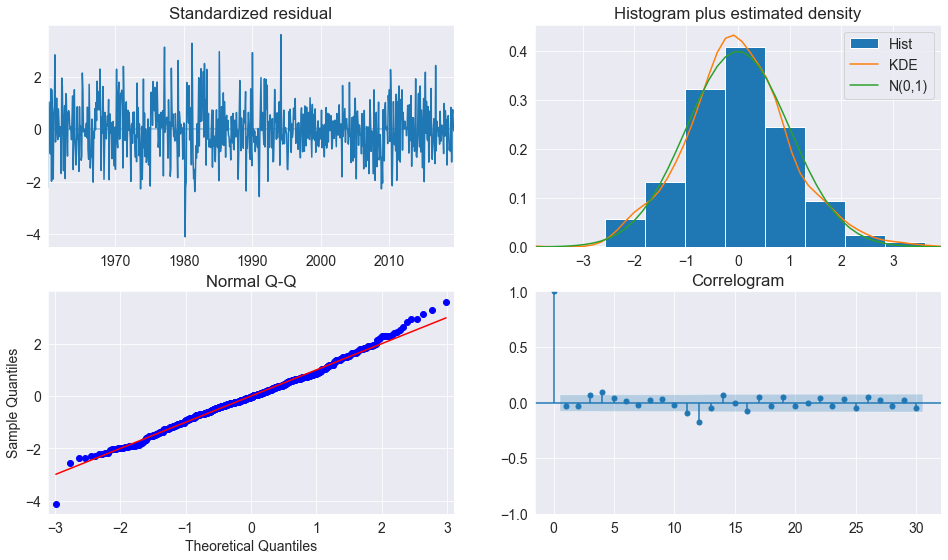

In [10]:
fig = plt.figure(figsize=(16, 9))
fig = res.plot_diagnostics(fig=fig, lags=30)

In [11]:
sel = ar_select_order(housing, 13, seasonal=True, old_names=False)
sel.ar_lags
res = sel.model.fit()
print(res.summary())

                            AutoReg Model Results                             
Dep. Variable:               HOUSTNSA   No. Observations:                  725
Model:               Seas. AutoReg(2)   Log Likelihood               -2652.556
Method:               Conditional MLE   S.D. of innovations              9.487
Date:                Tue, 18 Jan 2022   AIC                              4.541
Time:                        21:57:13   BIC                              4.636
Sample:                    04-01-1959   HQIC                             4.578
                         - 06-01-2019                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.2726      1.373      0.927      0.354      -1.418       3.963
s(2,12)        32.6477      1.824     17.901      0.000      29.073      36.222
s(3,12)        23.0685      2.435      9.472    

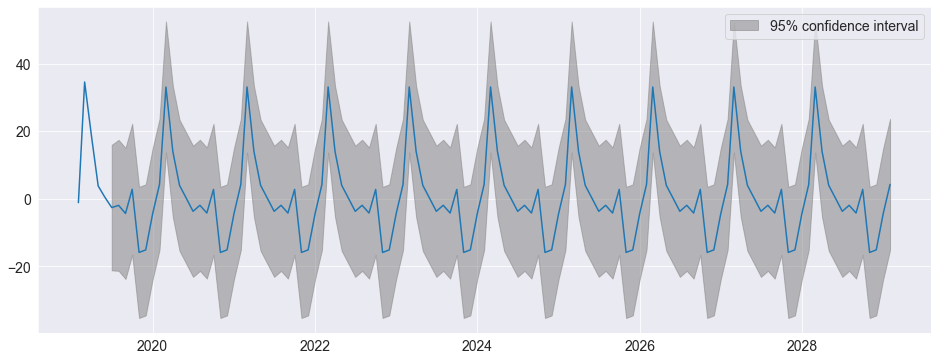

In [12]:
fig = res.plot_predict(720, 840)

/Applications/anaconda3/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


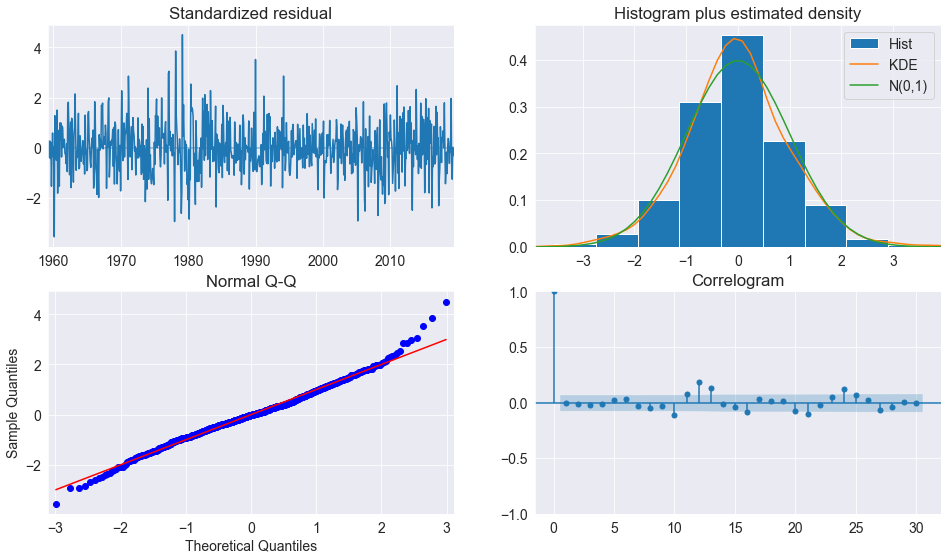

In [13]:
fig = plt.figure(figsize=(16, 9))
fig = res.plot_diagnostics(lags=30, fig=fig)

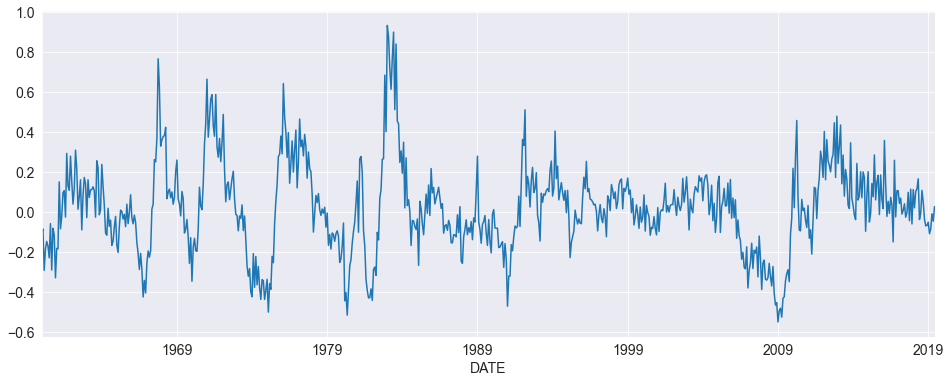

In [14]:
yoy_housing = data.HOUSTNSA.pct_change(12).resample("MS").last().dropna()
_, ax = plt.subplots()
ax = yoy_housing.plot(ax=ax)

In [15]:
sel = ar_select_order(yoy_housing, 13, old_names=False)
sel.ar_lags

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])

In [16]:
sel = ar_select_order(yoy_housing, 13, glob=True, old_names=False)
sel.ar_lags
res = sel.model.fit()
print(res.summary())

                            AutoReg Model Results                             
Dep. Variable:               HOUSTNSA   No. Observations:                  714
Model:             Restr. AutoReg(13)   Log Likelihood                 589.177
Method:               Conditional MLE   S.D. of innovations              0.104
Date:                Tue, 18 Jan 2022   AIC                             -4.496
Time:                        21:57:25   BIC                             -4.444
Sample:                    02-01-1961   HQIC                            -4.476
                         - 06-01-2019                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0035      0.004      0.875      0.382      -0.004       0.011
HOUSTNSA.L1      0.5640      0.035     16.167      0.000       0.496       0.632
HOUSTNSA.L2      0.2347      0.038      6.23

/Applications/anaconda3/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


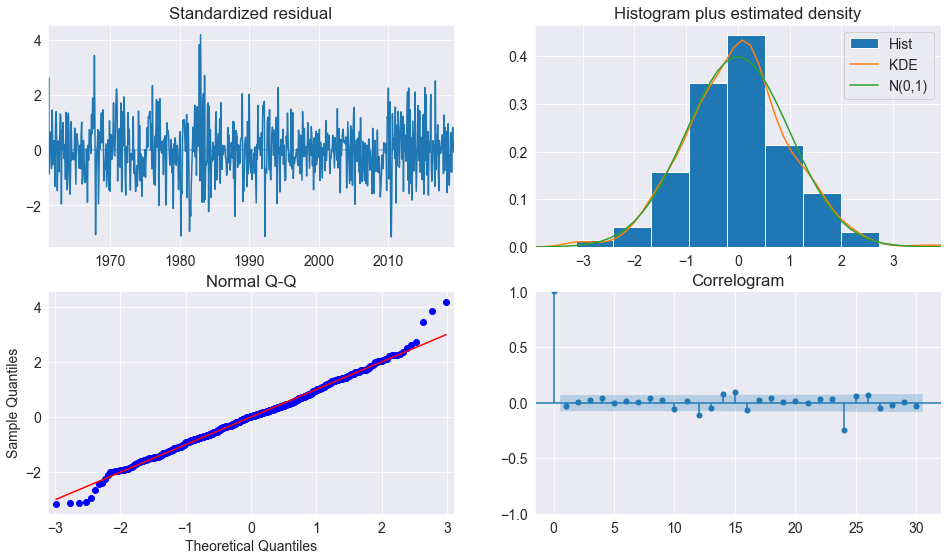

In [17]:
fig = plt.figure(figsize=(16, 9))
fig = res.plot_diagnostics(fig=fig, lags=30)

In [18]:
sel = ar_select_order(yoy_housing, 13, glob=True, seasonal=True, old_names=False)
sel.ar_lags
res = sel.model.fit()
print(res.summary())

                               AutoReg Model Results                                
Dep. Variable:                     HOUSTNSA   No. Observations:                  714
Model:             Restr. Seas. AutoReg(13)   Log Likelihood                 590.875
Method:                     Conditional MLE   S.D. of innovations              0.104
Date:                      Tue, 18 Jan 2022   AIC                             -4.469
Time:                              21:57:40   BIC                             -4.346
Sample:                          02-01-1961   HQIC                            -4.422
                               - 06-01-2019                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0167      0.014      1.215      0.224      -0.010       0.044
s(2,12)         -0.0179      0.019     -0.931      0.352      -0.056       0.

<AxesSubplot:xlabel='DATE'>

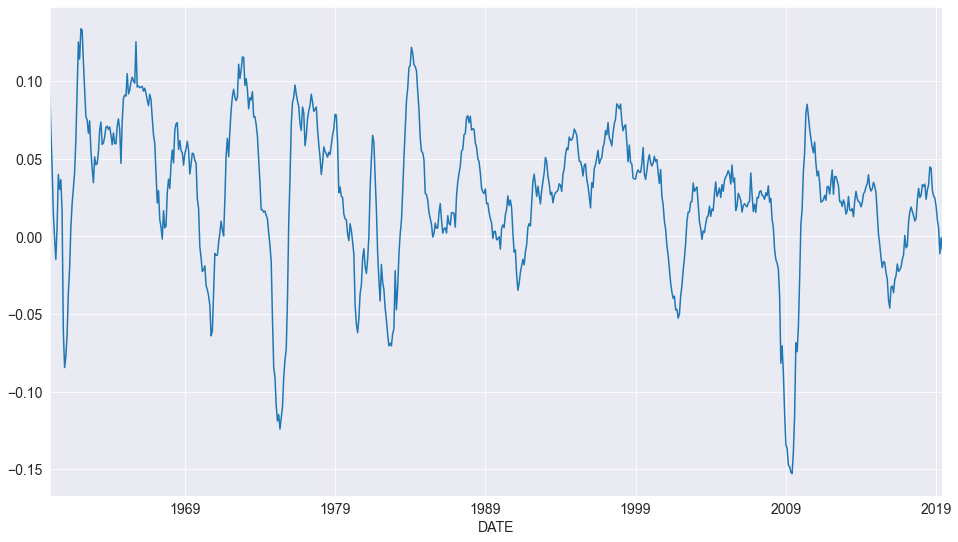

In [19]:
data = pdr.get_data_fred("INDPRO", "1959-01-01", "2019-06-01")
ind_prod = data.INDPRO.pct_change(12).dropna().asfreq("MS")
_, ax = plt.subplots(figsize=(16, 9))
ind_prod.plot(ax=ax)

In [20]:
sel = ar_select_order(ind_prod, 13, "bic", old_names=False)
res = sel.model.fit()
print(res.summary())


                            AutoReg Model Results                             
Dep. Variable:                 INDPRO   No. Observations:                  714
Model:                    AutoReg(13)   Log Likelihood                2322.160
Method:               Conditional MLE   S.D. of innovations              0.009
Date:                Tue, 18 Jan 2022   AIC                             -9.420
Time:                        21:57:42   BIC                             -9.323
Sample:                    02-01-1961   HQIC                            -9.383
                         - 06-01-2019                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0012      0.000      2.771      0.006       0.000       0.002
INDPRO.L1      1.1594      0.035     33.214      0.000       1.091       1.228
INDPRO.L2     -0.0837      0.053     -1.568      0.1

In [21]:
sel = ar_select_order(ind_prod, 13, "bic", glob=True, old_names=False)
sel.ar_lags
res_glob = sel.model.fit()
print(res.summary())

                            AutoReg Model Results                             
Dep. Variable:                 INDPRO   No. Observations:                  714
Model:                    AutoReg(13)   Log Likelihood                2322.160
Method:               Conditional MLE   S.D. of innovations              0.009
Date:                Tue, 18 Jan 2022   AIC                             -9.420
Time:                        21:57:50   BIC                             -9.323
Sample:                    02-01-1961   HQIC                            -9.383
                         - 06-01-2019                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0012      0.000      2.771      0.006       0.000       0.002
INDPRO.L1      1.1594      0.035     33.214      0.000       1.091       1.228
INDPRO.L2     -0.0837      0.053     -1.568      0.1

In [22]:
ind_prod.shape

(714,)

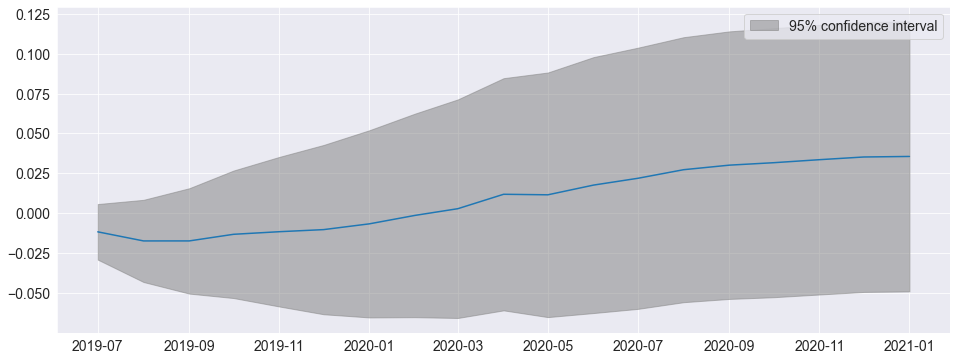

In [23]:
fig = res_glob.plot_predict(start=714, end=732)

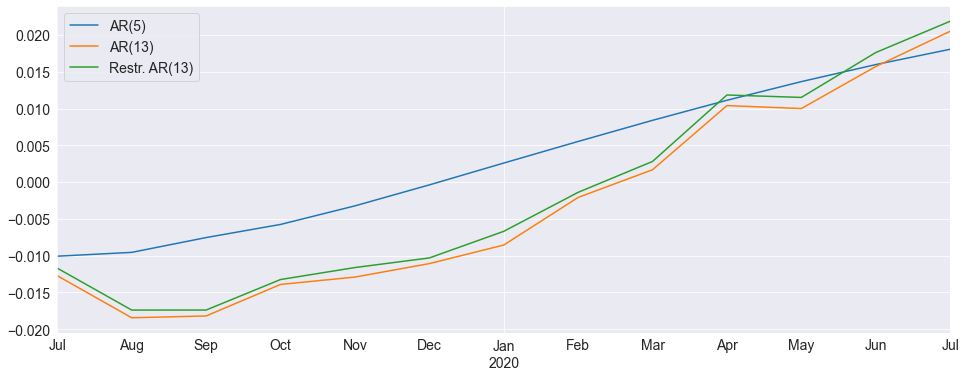

In [24]:
res_ar5 = AutoReg(ind_prod, 5, old_names=False).fit()
predictions = pd.DataFrame(
    {
        "AR(5)": res_ar5.predict(start=714, end=726),
        "AR(13)": res.predict(start=714, end=726),
        "Restr. AR(13)": res_glob.predict(start=714, end=726),
    }
)
_, ax = plt.subplots()
ax = predictions.plot(ax=ax)

/Applications/anaconda3/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


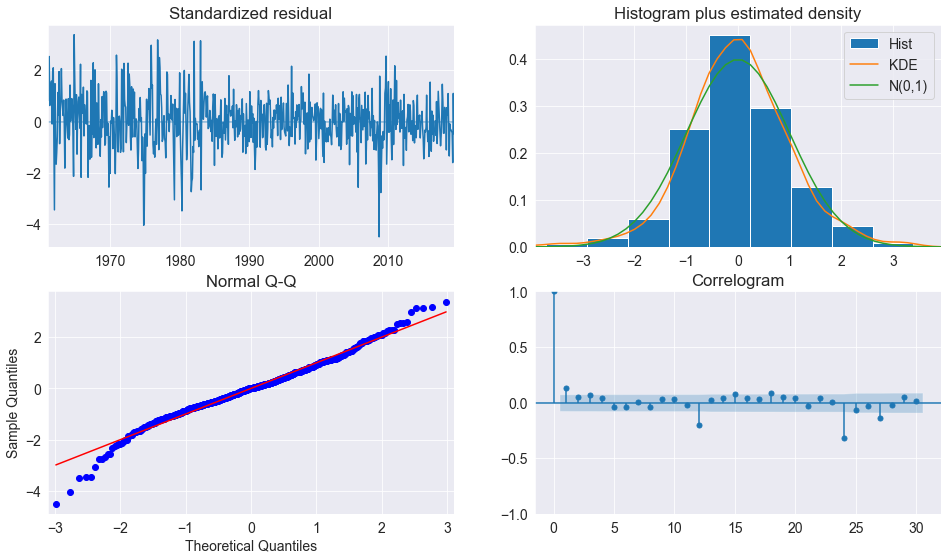

In [25]:
fig = plt.figure(figsize=(16, 9))
fig = res_glob.plot_diagnostics(fig=fig, lags=30)


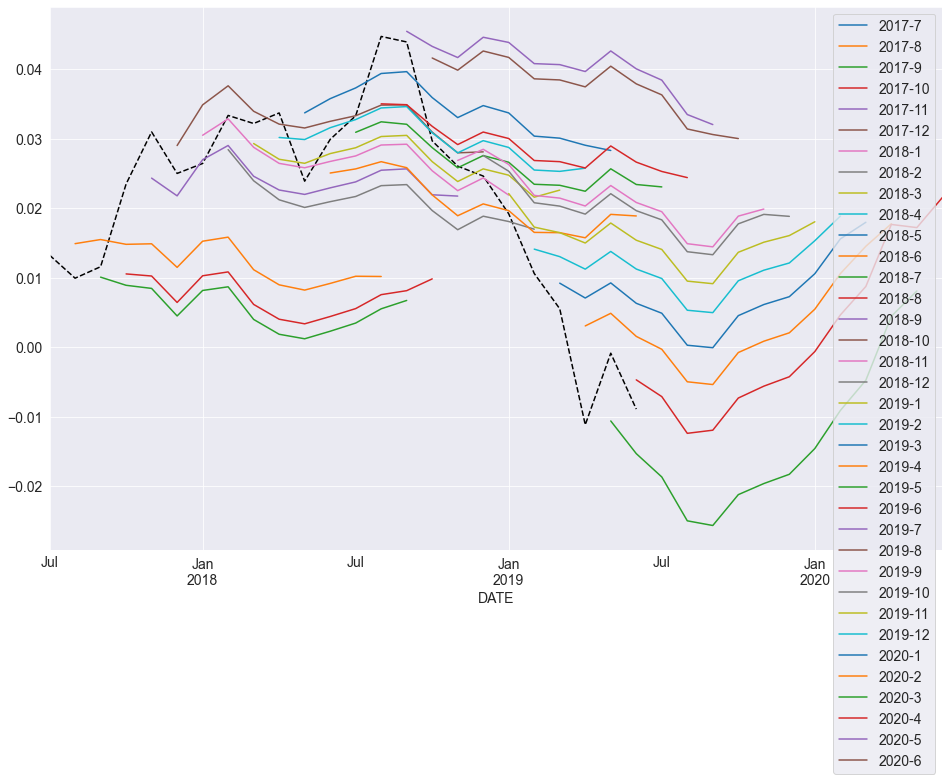

In [26]:
import numpy as np

start = ind_prod.index[-24]
forecast_index = pd.date_range(start, freq=ind_prod.index.freq, periods=36)
cols = ["-".join(str(val) for val in (idx.year, idx.month)) for idx in forecast_index]
forecasts = pd.DataFrame(index=forecast_index, columns=cols)
for i in range(1, 24):
    fcast = res_glob.predict(
        start=forecast_index[i], end=forecast_index[i + 12], dynamic=True
    )
    forecasts.loc[fcast.index, cols[i]] = fcast
_, ax = plt.subplots(figsize=(16, 10))
ind_prod.iloc[-24:].plot(ax=ax, color="black", linestyle="--")
ax = forecasts.plot(ax=ax)

In [27]:
from statsmodels.tsa.api import SARIMAX

sarimax_mod = SARIMAX(ind_prod, order=((1, 5, 12, 13), 0, 0), trend="c")
sarimax_res = sarimax_mod.fit()
print(sarimax_res.summary())

                                     SARIMAX Results                                     
Dep. Variable:                            INDPRO   No. Observations:                  714
Model:             SARIMAX([1, 5, 12, 13], 0, 0)   Log Likelihood                2304.595
Date:                           Tue, 18 Jan 2022   AIC                          -4597.189
Time:                                   21:57:57   BIC                          -4569.764
Sample:                               01-01-1960   HQIC                         -4586.598
                                    - 06-01-2019                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0011      0.000      2.510      0.012       0.000       0.002
ar.L1          1.0803      0.010    106.910

In [28]:
sarimax_params = sarimax_res.params.iloc[:-1].copy()
sarimax_params.index = res_glob.params.index
params = pd.concat([res_glob.params, sarimax_params], axis=1, sort=False)
params.columns = ["AutoReg", "SARIMAX"]
params

,AutoReg,SARIMAX
const,0.001226,0.001076
INDPRO.L1,1.089015,1.080321
INDPRO.L5,-0.105888,-0.084833
INDPRO.L12,-0.387561,-0.442214
INDPRO.L13,0.361547,0.406722


In [29]:
from statsmodels.tsa.deterministic import DeterministicProcess

dp = DeterministicProcess(housing.index, constant=True, period=12, fourier=2)
mod = AutoReg(housing, 2, trend="n", seasonal=False, deterministic=dp)
res = mod.fit()
print(res.summary())

                            AutoReg Model Results                             
Dep. Variable:               HOUSTNSA   No. Observations:                  725
Model:                     AutoReg(2)   Log Likelihood               -2716.505
Method:               Conditional MLE   S.D. of innovations             10.364
Date:                Tue, 18 Jan 2022   AIC                              4.699
Time:                        21:57:57   BIC                              4.750
Sample:                    04-01-1959   HQIC                             4.718
                         - 06-01-2019                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.7550      0.391      4.485      0.000       0.988       2.522
sin(1,12)      16.7443      0.860     19.478      0.000      15.059      18.429
cos(1,12)       4.9409      0.588      8.409    

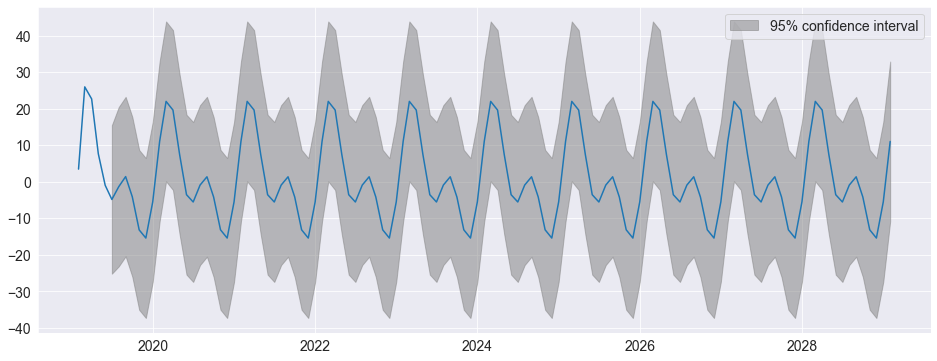

In [30]:
fig = res.plot_predict(720, 840)